In [7]:
import pandas as pd
data = pd.read_csv("data.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

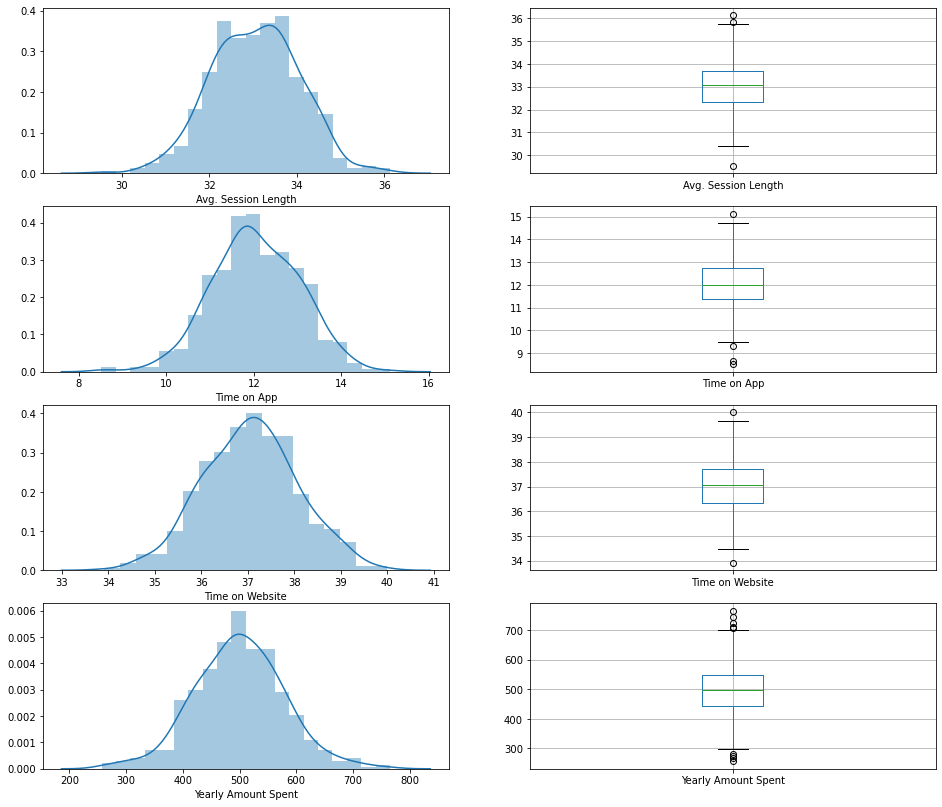

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(4,2, figsize=(16,14))
sns.distplot(data["Avg. Session Length"], ax= ax[0][0])
data.boxplot("Avg. Session Length", ax= ax[0][1])


sns.distplot(data["Time on App"], ax= ax[1][0])
data.boxplot("Time on App", ax= ax[1][1])


sns.distplot(data["Time on Website"], ax= ax[2][0])
data.boxplot("Time on Website", ax= ax[2][1])

sns.distplot(data["Yearly Amount Spent"], ax= ax[3][0])
data.boxplot("Yearly Amount Spent", ax= ax[3][1])



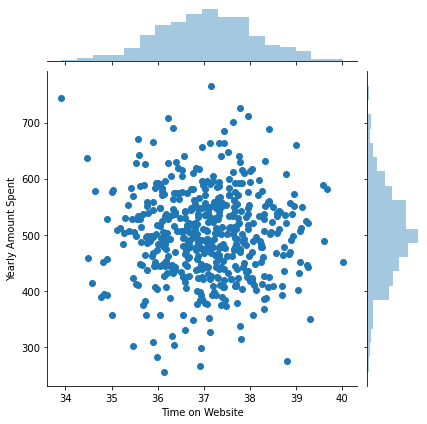

In [20]:
sns.jointplot(data['Time on Website' ],data['Yearly Amount Spent'])

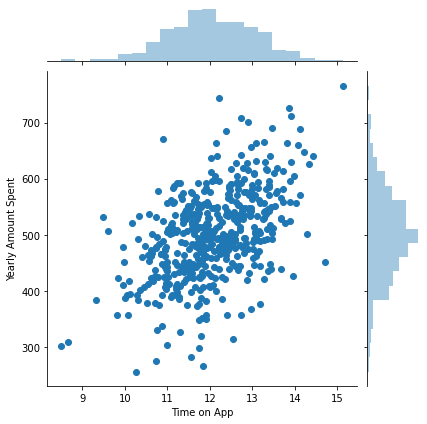

In [22]:
sns.jointplot(data["Time on App"], data["Yearly Amount Spent"])

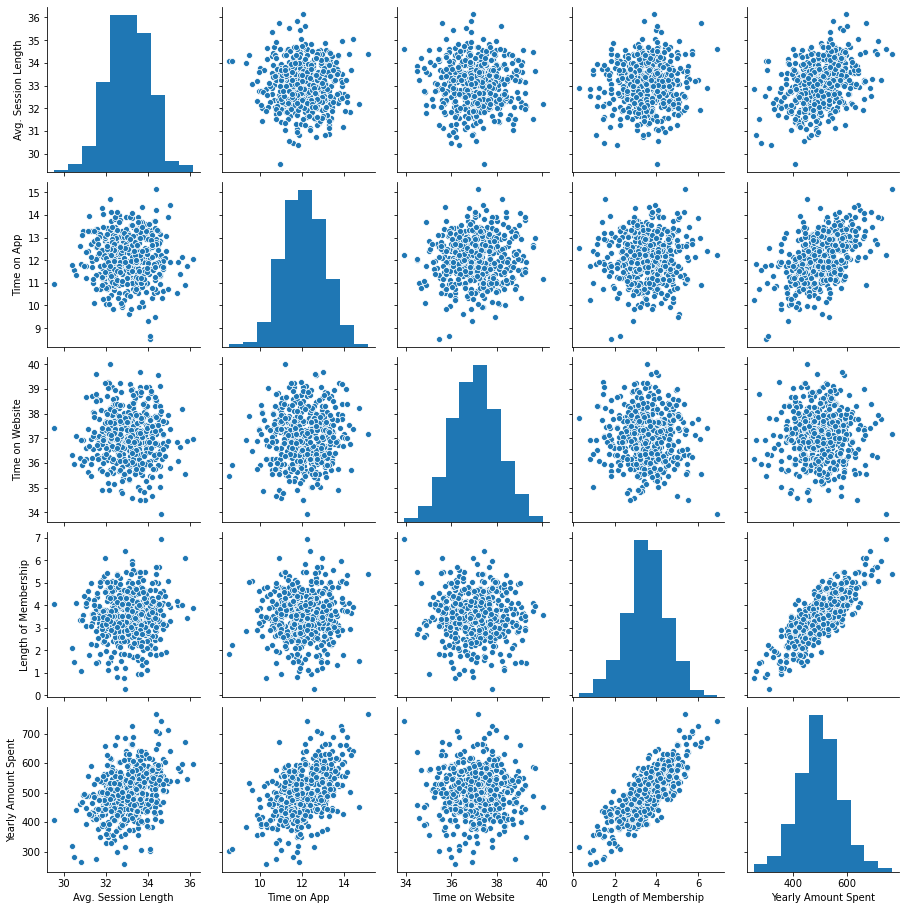

In [23]:
sns.pairplot(data)

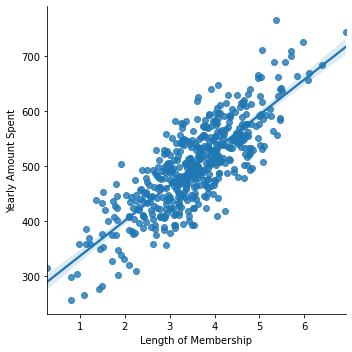

In [24]:
sns.lmplot(x="Length of Membership", y = "Yearly Amount Spent", data = data)

In [44]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]
print(X.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Yearly Amount Spent  500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB
None


In [45]:
X.drop(["Email","Address","Avatar"],axis = 1, inplace = True)

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 43)

In [51]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [52]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[25.79187592 38.80672394  0.19510947 61.7585427 ]]


In [53]:
y_pred = lm.predict(x_test)

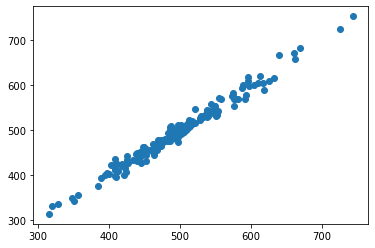

In [57]:
plt.scatter(y_test,y_pred)


In [63]:
from sklearn import metrics
import numpy as np
print("Mean abs error", metrics.mean_absolute_error( y_pred,y_test))
print("Mean squared error", metrics.mean_squared_error(y_pred, y_test))
print("Root Mean squared error", np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Mean abs error 8.67718647988571
Mean squared error 119.12628271632396
Root Mean squared error 10.914498738665188


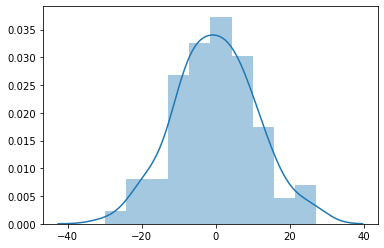

In [64]:
sns.distplot(y_pred-y_test, bins = 10)

In [127]:
weights = pd.DataFrame(lm.coef_.T, index =["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"])
weights.columns = ['Coeffecient']
weights.head()


,Coeffecient
Avg. Session Length,25.791876
Time on App,38.806724
Time on Website,0.195109
Length of Membership,61.758543


In [128]:
#Time on App is having higher weight. Hence its contributes more
